# Support Vector Machine 

* The support vector machine is a generalization of a simple and intu-itive classifier called the *maximal margin classifier*
* maximal margin classifier :  cannot be applied to most data sets, since it requires that the classes be separable by a linear boundary.
* support vector classifier, an extension of the maximal margin classifier that can be applied in a broader range of cases.
* support vector machine, which is a further extension of the support vec-tor classifier in order to accommodate *non-linear* class boundaries.
* Support vector machines are intended for the binary classification setting
* There are extensions of support vector machines to the case of more than two classes.
* close connections between support vector machines and other statistical methods such as logistic regression.


In [54]:
library(tidyverse)
library(e1071) # for svm 
library(ROCR) # for roc curve

### Create a Dataset
* Not seperable two classes.

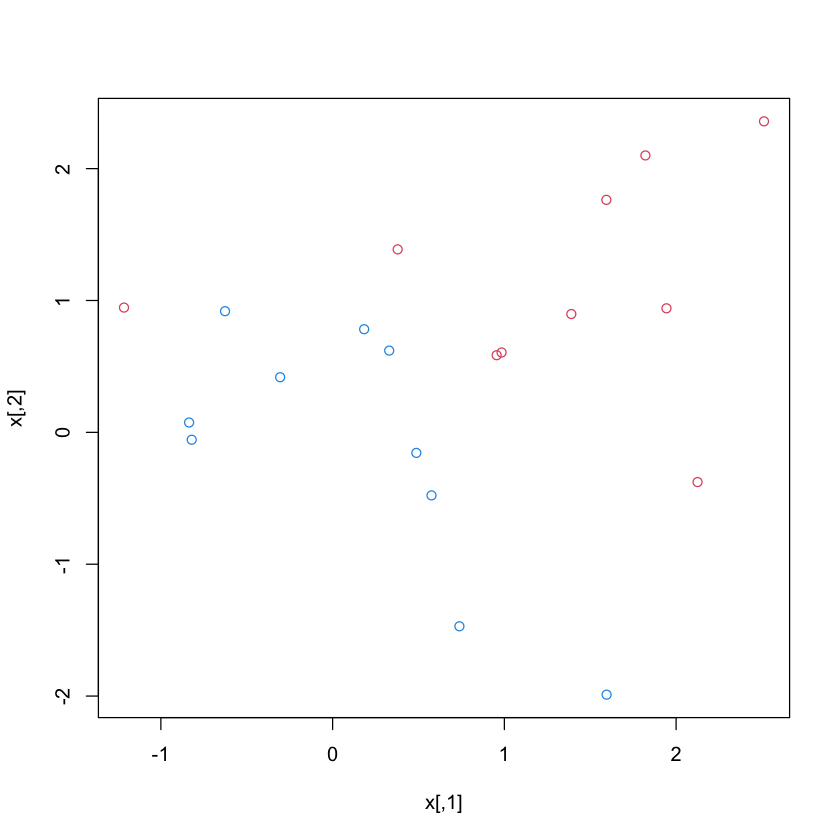

In [15]:
set.seed(1)
x <- matrix(rnorm(20 * 2), ncol = 2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 1
plot(x, col = (3 - y))


### Fitting a Linear SVM model with cost 10

In [16]:
dat <- data.frame(x = x, y = as.factor(y))

In [17]:
glimpse(dat)

Rows: 20
Columns: 3
$ x.1 <dbl> -0.6264538, 0.1836433, -0.8356286, 1.5952808, 0.3295078, -0.820468…
$ x.2 <dbl> 0.91897737, 0.78213630, 0.07456498, -1.98935170, 0.61982575, -0.05…
$ y   <fct> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…


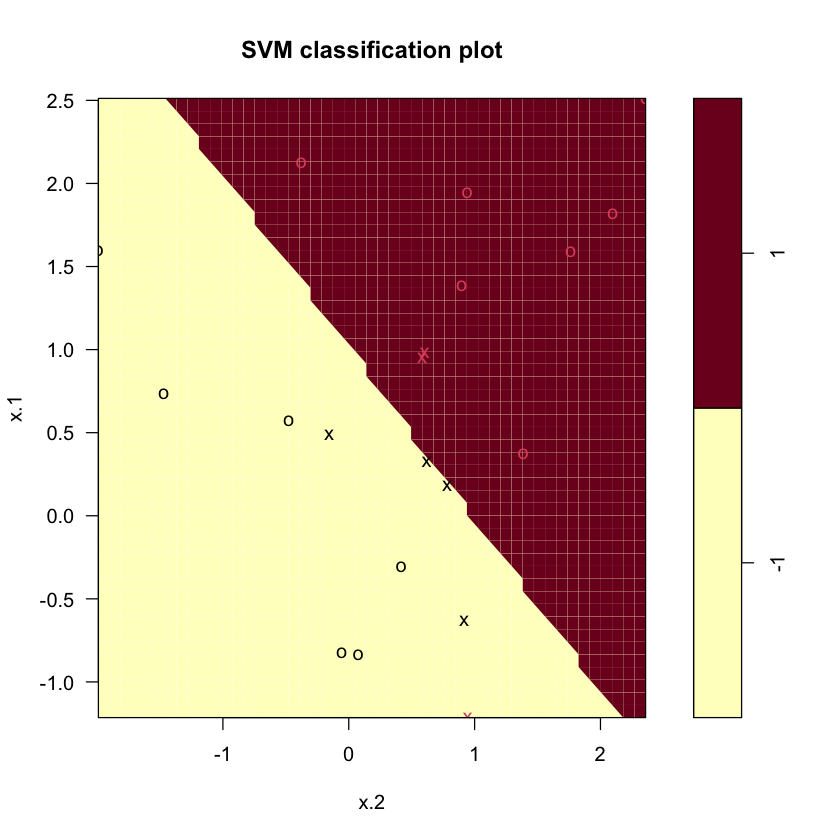

In [19]:
svm.fit <- svm(y~. , data = dat, kernel = "linear",
               cost = 10, scale = FALSE)
plot(svm.fit, data = dat)

In [20]:
svm.fit$index

[1]  1  2  5  7 14 16 17

In [21]:
summary(svm.fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




#### Fitting a Linear SVM model with cost 0.1

In [23]:
svm.fit <- svm(y~. , data = dat, kernel = "linear",
               cost = 0.1, scale = FALSE)
summary(svm.fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




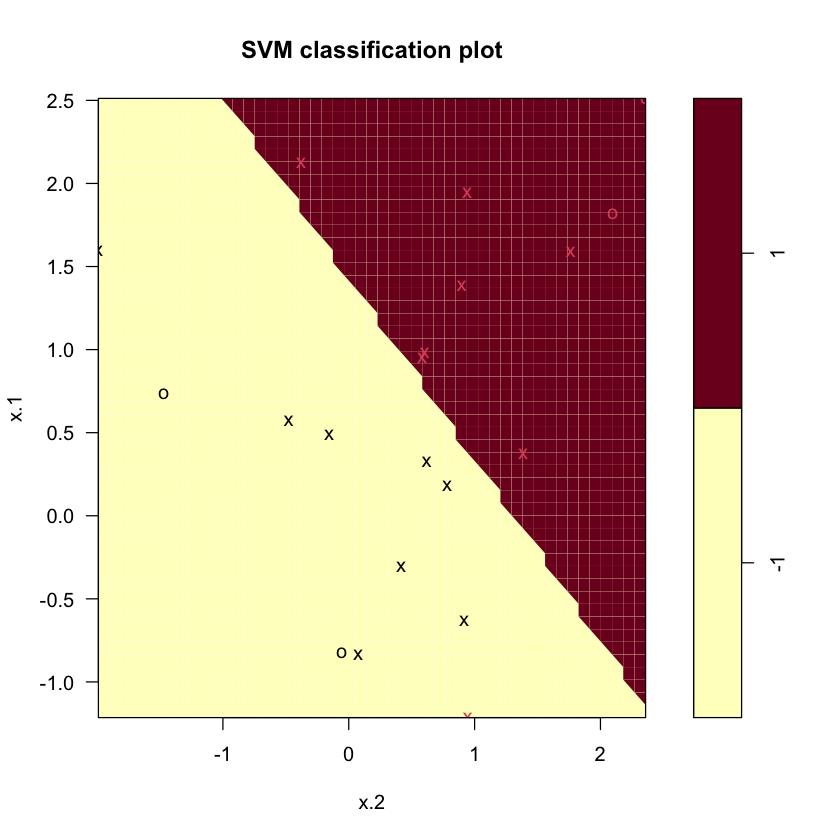

In [24]:
plot(svm.fit, dat)

#### Cross Validation to select optimum cost

In [26]:

set.seed(1)
tune.out <- tune(svm, y ~ . , data = dat, kernel = "linear",
                 ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100))
)
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [27]:
best.model <- tune.out$best.model
summary(best.model)


Call:
best.tune(METHOD = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




### create test data

In [28]:
xtest <- matrix(rnorm(20 * 2), ncol = 2)
ytest <- sample(c(-1, 1), 20, rep = TRUE)
xtest[ytest == 1, ] <- xtest[ytest == 1, ] + 1
testdat <- data.frame(x = xtest, y = as.factor(ytest))

In [31]:
# prediction on test data using the best model 
ypred <- predict(best.model, testdat)
# create table with prediction and test y 
table(predict = ypred, truth = testdat$y)

       truth
predict -1 1
     -1  9 1
     1   2 8

In [32]:
# try to build a model with 0.01 cost
svm.fit2 <- svm(y ~ . , data = dat, kernel = "linear",
cost = 0.01, scale = FALSE)
y_pred2 <- predict(svm.fit2, testdat)
table(predict = y_pred2, truth = testdat$y)

       truth
predict -1  1
     -1 11  6
     1   0  3

### Linearly seperable classes


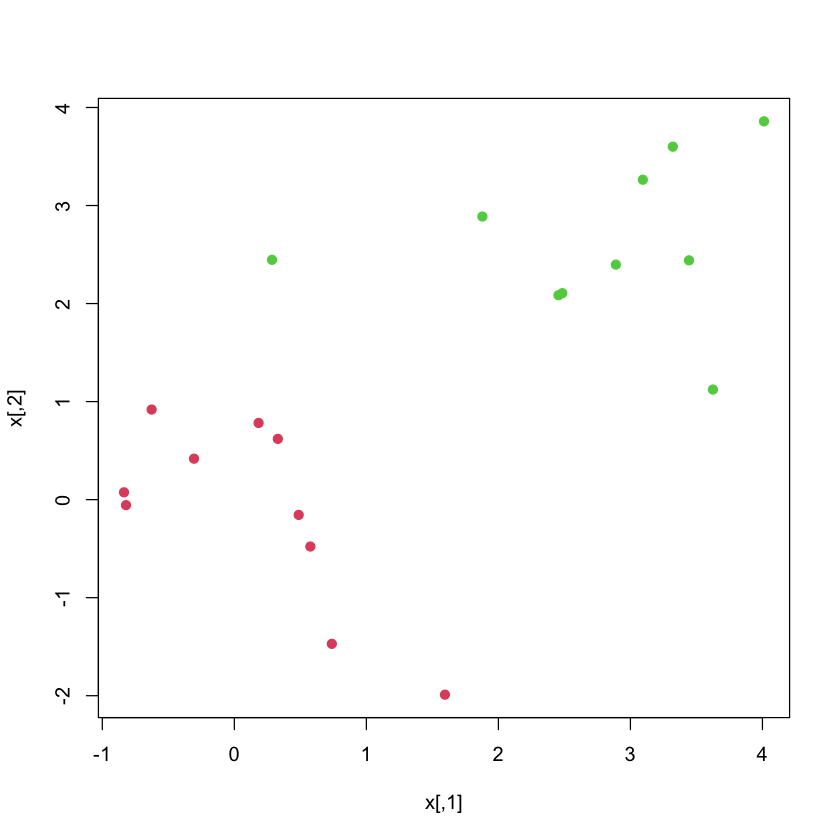

In [38]:
# We fit the support vector classifier and plot the resulting hyperplane, using a very large value of cost 
# so that no observations are misclassified
x[y == 1, ] <- x[y == 1, ] + 0.5
plot(x, col = (y + 5) / 2, pch = 19)

In [39]:
dat <- data.frame(x = x, y = as.factor(y))
svm.fit <- svm(y~ ., data = dat, kernel = "linear",
cost = 1e5)
summary(svm.fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




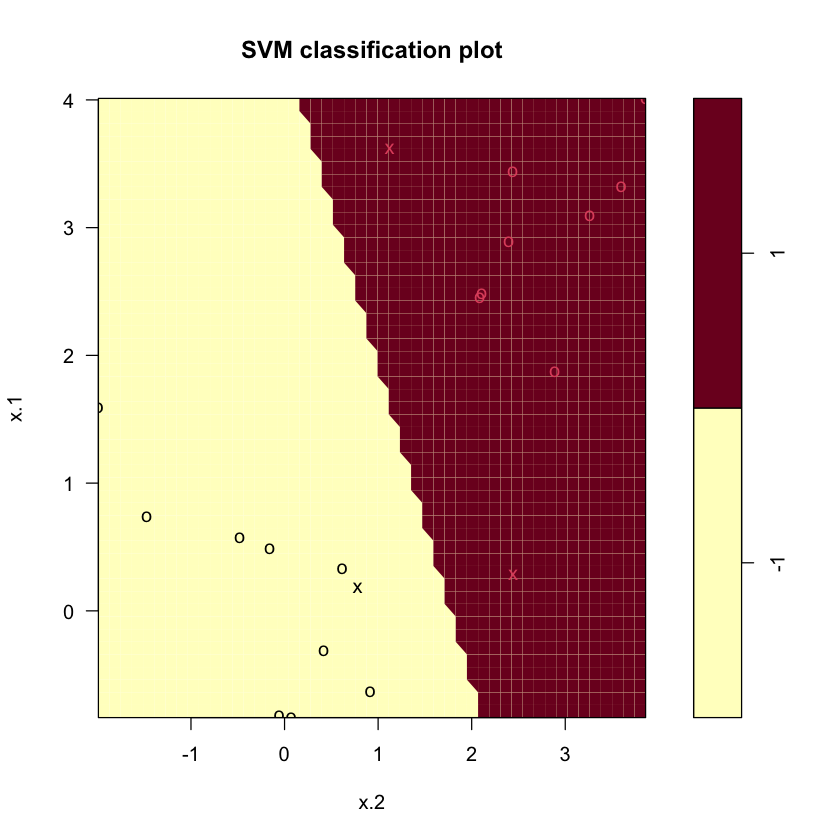

In [40]:
plot(svm.fit, dat)

In [36]:
svmfit <- svm(y ~ ., data = dat, kernel = "linear", cost = 1)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




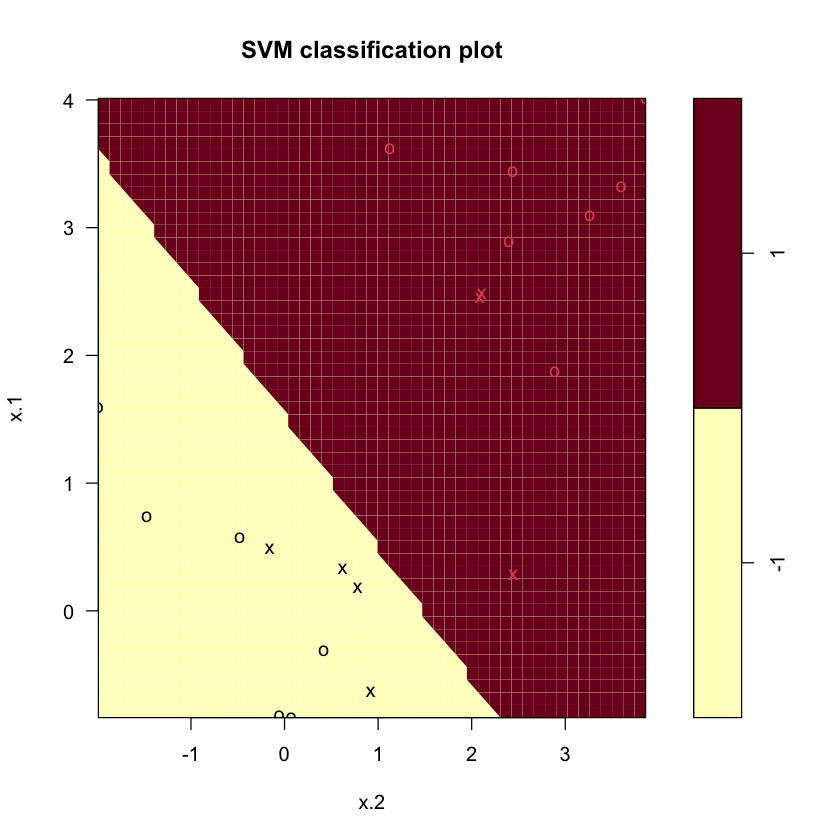

In [41]:
plot(svmfit, dat)

### 
* Using cost = 1, we misclassify a training observation, but we also obtain a much wider margin and make use of seven support vectors. 
* cost = 1, model will perform better on test data than the model with cost = 1e5

### Support Vector Machine : Non Linear 
* polynomial - use degree argument
* radial - use gamma

In [42]:
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] <- x[1:100, ] + 2
x[101:150, ] <- x[101:150, ] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))

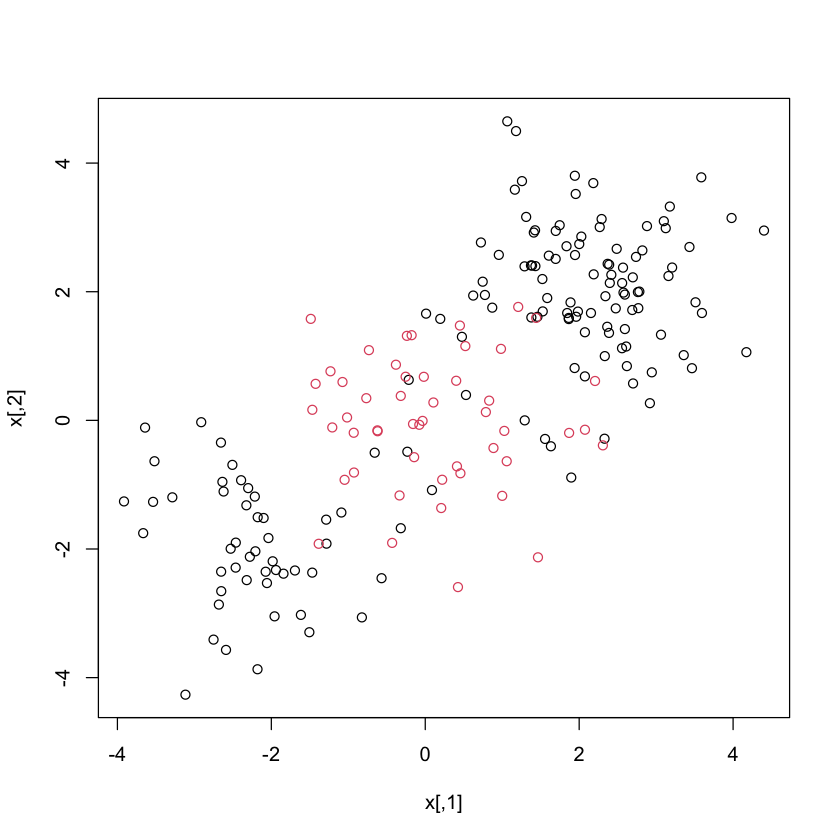

In [43]:
plot(x, col = y)

#### Split Data

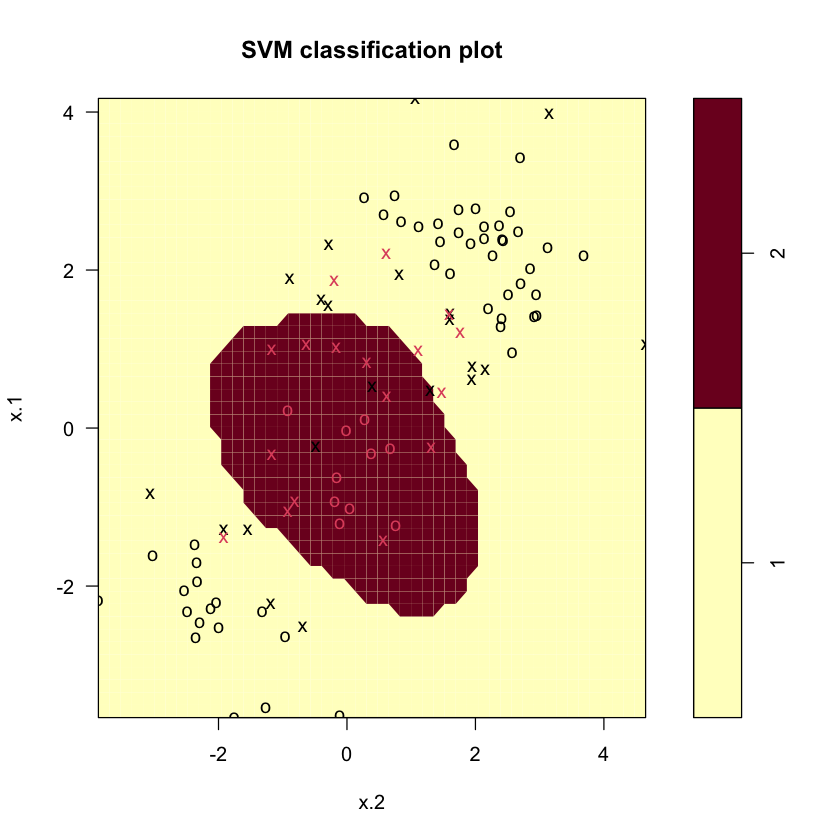

In [48]:
train <- sample(200, 100)
svm.fit <- svm(y ~ ., data = dat[train, ], kernel = "radial", gamma = 1 , 
               cost = 1)
plot(svm.fit, dat[train, ])

In [49]:
summary(svm.fit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  38

 ( 21 17 )


Number of Classes:  2 

Levels: 
 1 2




#### Increase cost
* increase cost : reduce misclassification errors, but irregular decision boundary increase risk of overfitting

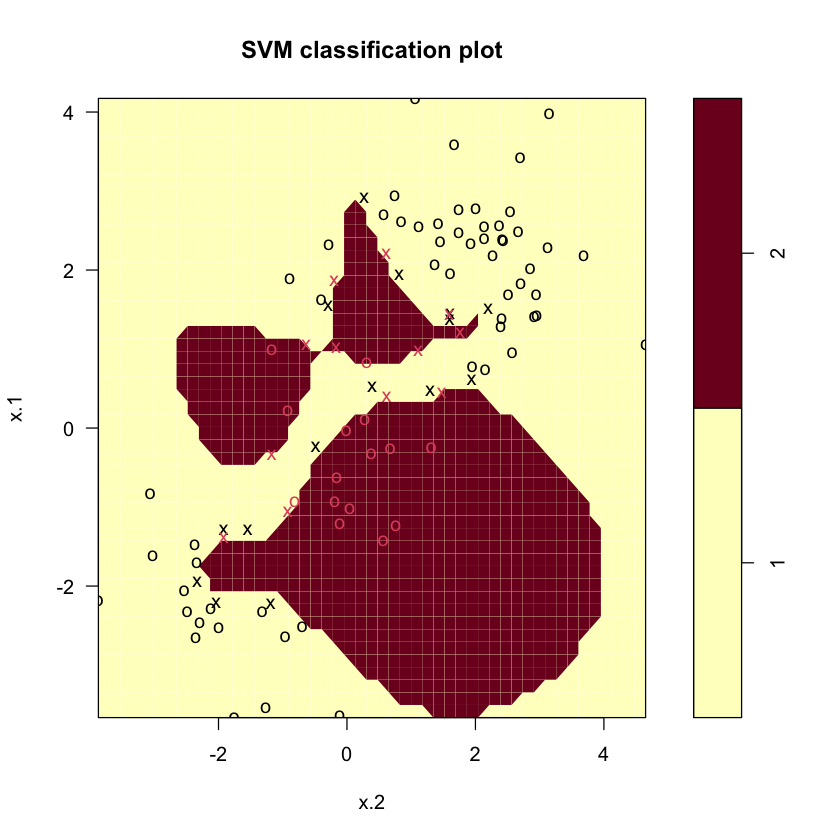

In [50]:

svm.fit2 <- svm(y ~., data = dat[train, ], kernel = "radial",gamma = 1, 
                cost = 1e5)
plot(svm.fit2, dat[train, ])

In [51]:
summary(svm.fit2)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 

Number of Support Vectors:  27

 ( 15 12 )


Number of Classes:  2 

Levels: 
 1 2




### Cross Validation to select best cost and gamma 

In [52]:
set.seed(1)
tune.out <- tune(svm, y~., data = dat[train, ], 
                 kernel = "radial",
                 ranges = list(
                     cost = c(0.1, 1, 10, 100, 1000),
                     gamma = c(0.5, 1, 2, 3, 4)
))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     3

- best performance: 0.1 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.16363917
2  1e+00   0.5  0.11 0.07378648
3  1e+01   0.5  0.12 0.07888106
4  1e+02   0.5  0.16 0.06992059
5  1e+03   0.5  0.18 0.07888106
6  1e-01   1.0  0.24 0.16465452
7  1e+00   1.0  0.11 0.07378648
8  1e+01   1.0  0.13 0.06749486
9  1e+02   1.0  0.16 0.08432740
10 1e+03   1.0  0.20 0.06666667
11 1e-01   2.0  0.27 0.16363917
12 1e+00   2.0  0.13 0.09486833
13 1e+01   2.0  0.15 0.08498366
14 1e+02   2.0  0.19 0.05676462
15 1e+03   2.0  0.23 0.08232726
16 1e-01   3.0  0.27 0.16363917
17 1e+00   3.0  0.10 0.08164966
18 1e+01   3.0  0.16 0.08432740
19 1e+02   3.0  0.20 0.08164966
20 1e+03   3.0  0.24 0.08432740
21 1e-01   4.0  0.27 0.16363917
22 1e+00   4.0  0.10 0.08164966
23 1e+01   4.0  0.18 0.06324555
24 1e+02   4.0  0.21 0.05676462
25 1e+03   4.0  0.22 0.

In [53]:
# predict using best model
table(
    true = dat[-train, "y"],
    pred = predict(tune.out$best.model, 
                   newdata = dat[-train, ])
)

    pred
true  1  2
   1 70  7
   2  5 18

In [55]:
rocplot <- function(pred, truth, ...) {
  predob <- prediction(pred, truth)
  perf <- performance(predob, "tpr", "fpr")
  plot(perf, ...)
}

In [56]:
svm.fit.opt <- svm(y~., data = dat[train, ],
                   kernel = "radial", 
                   gamma = 2, cost = 1,
                   decision.values = T)

fitted <- attributes(predict(svm.fit.opt, dat[train, ], 
                             decision.values = TRUE))$decision.values

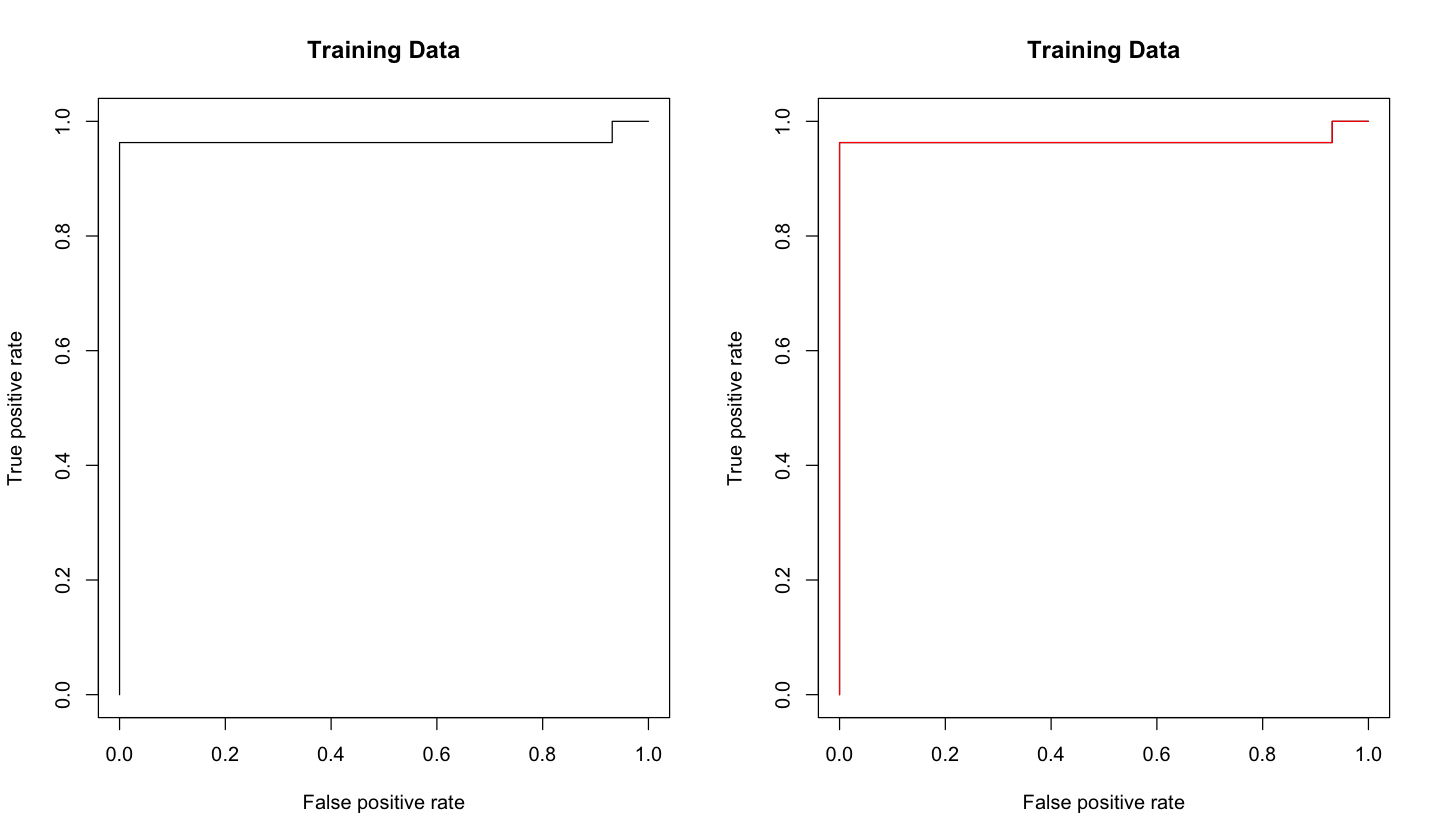

In [60]:
options(repr.plot.width = 12, repr.plot.height = 7) 
par(mfrow = c(1, 2))
rocplot(-fitted, dat[train, "y"], main = "Training Data")
# increase gamma
rocplot(-fitted, dat[train, "y"], main = "Training Data")
svmfit.flex <- svm(y ~ ., data = dat[train, ],
                   kernel = "radial", gamma = 50, cost = 1,
                   decision.values = T)

fitted <- attributes(predict(svmfit.flex, dat[train, ], decision.values = T))$decision.values
rocplot(-fitted, dat[train, "y"], add = T, col = "red")

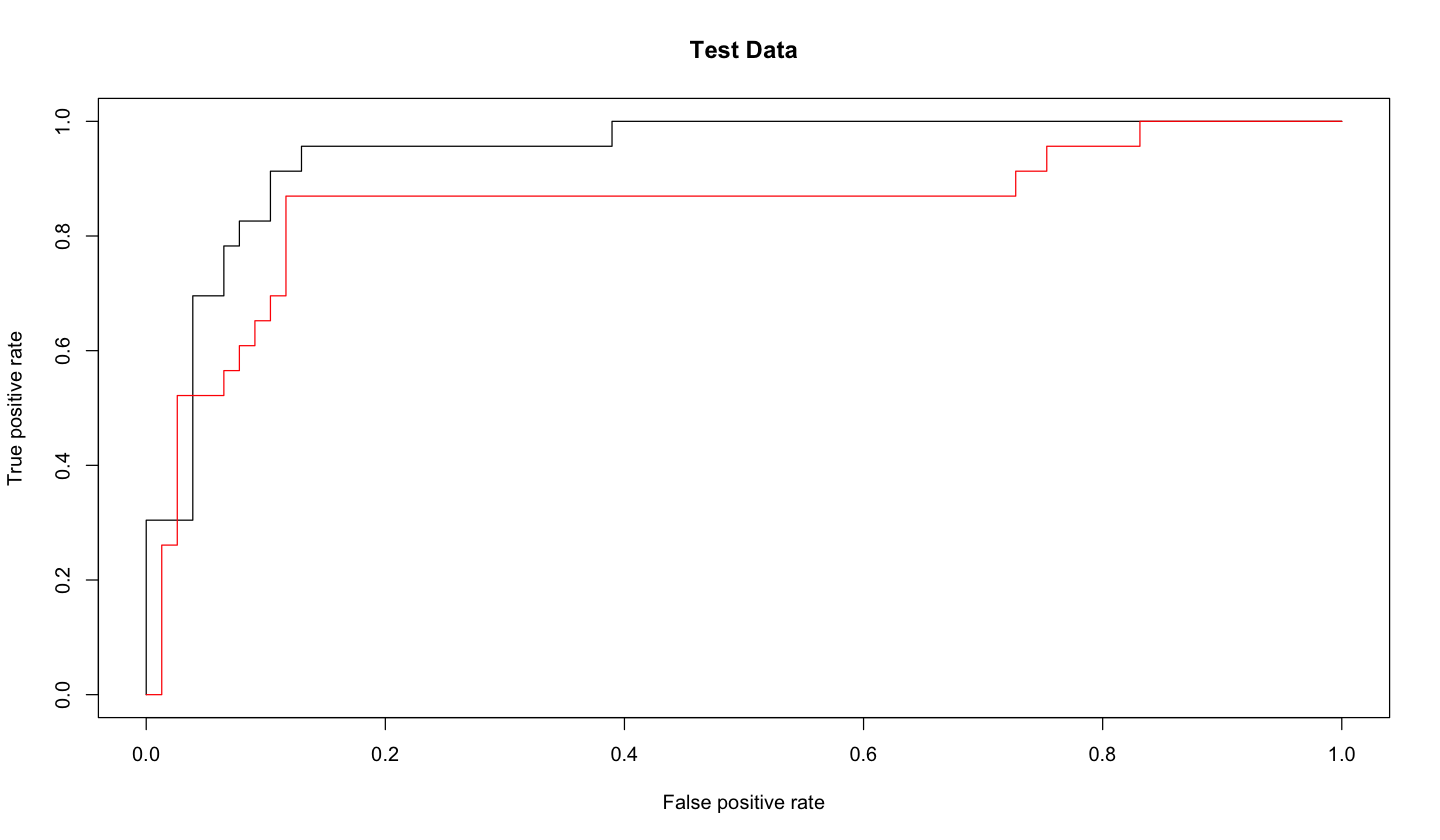

In [61]:
fitted <- attributes(
predict(svm.fit.opt, dat[-train, ], decision.values = T)
)$decision.values
rocplot(-fitted, dat[-train, "y"], main = "Test Data")
fitted <- attributes(
predict(svmfit.flex, dat[-train, ], decision.values = T)
)$decision.values
rocplot(-fitted, dat[-train, "y"], add = T, col = "red")